# NOTEBOOK PART 2

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz


In [38]:
df_train = pd.read_csv("train2_dataset.csv")
columnas_a_codificar = ['Primary streaming service','While working','Fav genre','Frequency [Classical]','Frequency [EDM]','Frequency [Folk]','Frequency [Hip hop]','Frequency [Metal]','Frequency [Pop]','Frequency [R&B]','Frequency [Rock]','Frequency [Video game music]', 'Music effects']

# Aplica OneHotEncoder a las columnas seleccionadas
enc = OneHotEncoder(handle_unknown='ignore')
encoded_columns = enc.fit_transform(df_train[columnas_a_codificar])
encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=enc.get_feature_names_out(columnas_a_codificar))
df_train_encoded = pd.concat([df_train, encoded_df], axis=1)

# Elimina las columnas originales que han sido codificadas
df_train_encoded = df_train_encoded.drop(columnas_a_codificar, axis=1)

print(df_train_encoded.to_string(index=False))
df_train_encoded.to_csv("train2_dataset.csv", index=False)

 Age  Hours per day  Anxiety  Depression  Insomnia  OCD  Primary streaming service_Apple Music  Primary streaming service_I do not use a streaming service.  Primary streaming service_Other streaming service  Primary streaming service_Spotify  Primary streaming service_YouTube Music  While working_No  While working_Yes  While working_nan  Fav genre_Classical  Fav genre_EDM  Fav genre_Folk  Fav genre_Hip hop  Fav genre_Metal  Fav genre_Pop  Fav genre_R&B  Fav genre_Rock  Fav genre_Video game music  Frequency [Classical]_Never  Frequency [Classical]_Rarely  Frequency [Classical]_Sometimes  Frequency [Classical]_Very frequently  Frequency [EDM]_Never  Frequency [EDM]_Rarely  Frequency [EDM]_Sometimes  Frequency [EDM]_Very frequently  Frequency [Folk]_Never  Frequency [Folk]_Rarely  Frequency [Folk]_Sometimes  Frequency [Folk]_Very frequently  Frequency [Hip hop]_Never  Frequency [Hip hop]_Rarely  Frequency [Hip hop]_Sometimes  Frequency [Hip hop]_Very frequently  Frequency [Metal]_Never  F

Se realiza el árbol de decisiones con Weka

*En este proyecto, utilizaremos el software Weka para construir árboles de decisión utilizando el algoritmo J48 para predecir la columna "Music Effects" de nuestro conjunto de datos. El objetivo es comprender cómo diferentes variables predictoras influyen en los efectos musicales reportados por los usuarios.*

*Proceso de Análisis: Cargaremos nuestro conjunto de datos en Weka y realizaremos cualquier preprocesamiento necesario, como manejo de valores faltantes o normalización de datos; seleccionaremos la columna "Music Effects" como nuestra variable objetivo, que es la que deseamos predecir. En Weka, esta columna se denomina "Class" y debe ser categórica; utilizaremos el algoritmo J48, un clasificador basado en árboles de decisión. Este algoritmo construirá un modelo de regresión que relacionará las variables predictoras con la columna "Music Effects".*

*Análisis de Resultados: Una vez que se ejecute el algoritmo, analizaremos los resultados obtenidos.*

*El árbol de decisión nos proporcionará información sobre cómo las diferentes variables predictoras influyen en los efectos musicales reportados por los usuarios, lo que nos ayudará a comprender mejor el comportamiento de la columna "Music Effects".*

*Explicación del Algoritmo J48: El algoritmo J48 es una implementación del algoritmo C4.5, diseñado para construir árboles de decisión en aprendizaje automático. Comienza seleccionando el mejor atributo para dividir el conjunto de datos en subconjuntos más homogéneos, utilizando medidas como la ganancia de información. Luego, divide recursivamente el conjunto de datos en función de estos atributos, creando nodos que representan las decisiones tomadas en cada división. El proceso continúa hasta que se cumple un criterio de parada. Posteriormente, el árbol puede ser podado para mejorar la generalización. Finalmente, el árbol se utiliza para clasificar nuevas instancias, siguiendo el camino apropiado a través de sus nodos basándose en los valores de sus atributos.*

**Árbol de decisiones - Music Effects**

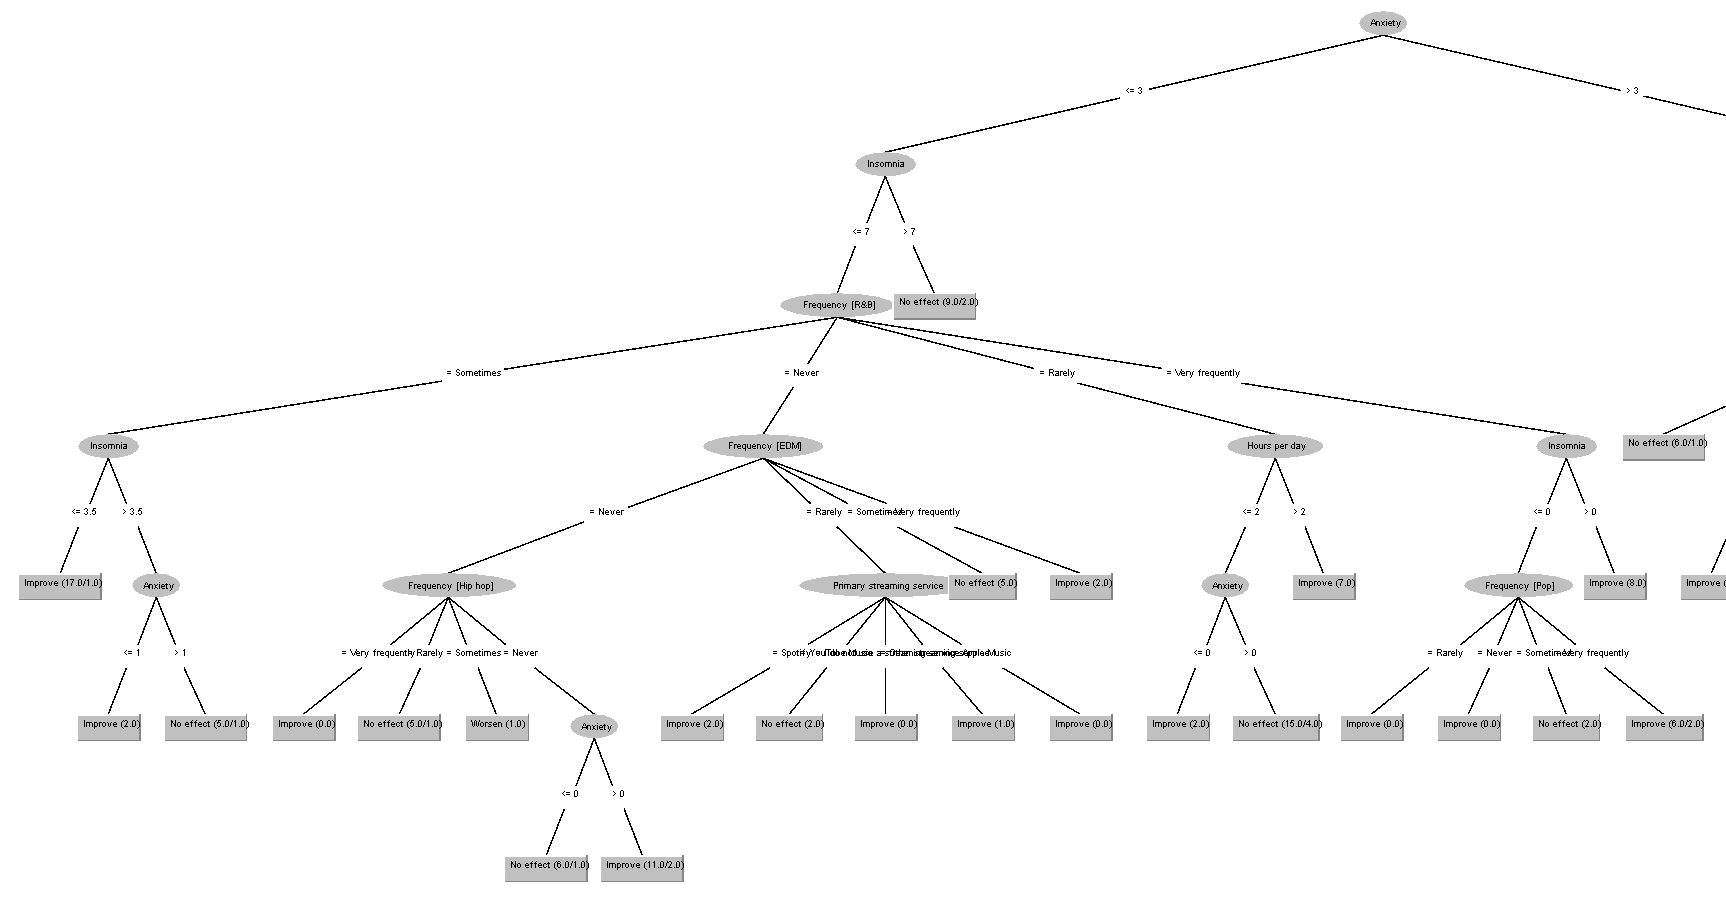

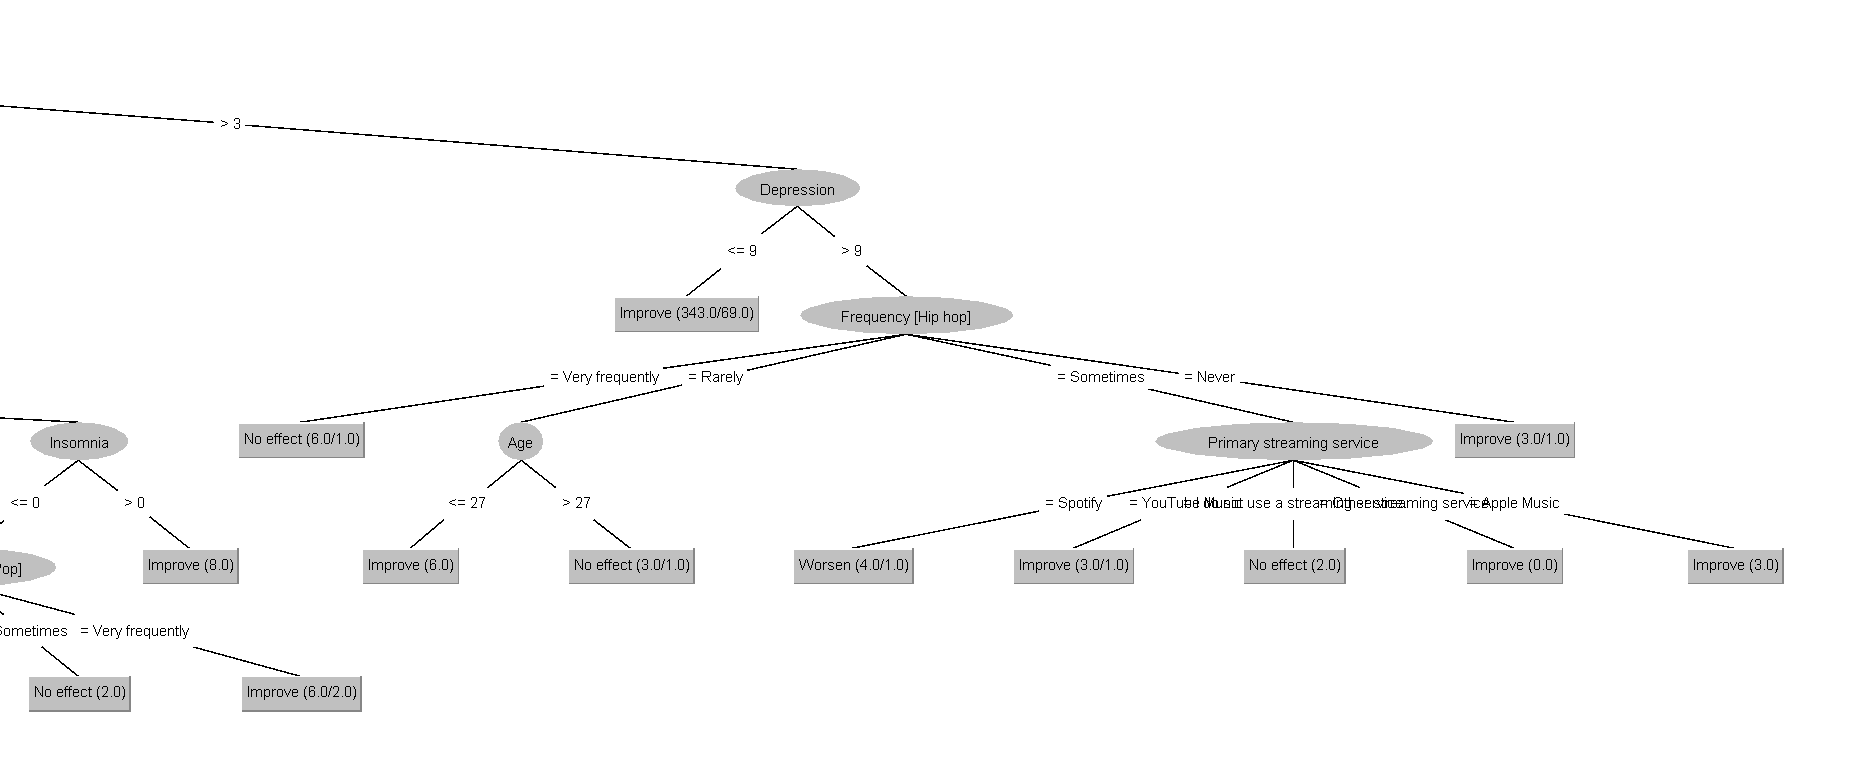

El análisis del árbol de decisiones revela patrones interesantes sobre cómo diferentes variables influyen en el efecto de la música en la salud mental. Por ejemplo, se observa que cuando los niveles de ansiedad son menores al umbral de 3, hay una mayor probabilidad de que el efecto de la música mejore la salud mental, evidenciado por la predominancia de nodos hojas "Improve" en el lado izquierdo del árbol. Esto sugiere que la música puede tener un impacto positivo en la salud mental, especialmente en individuos que experimentan niveles moderados o bajos de ansiedad.

Al recorrer el árbol desde la raíz, se destaca el papel fundamental de las enfermedades mentales en la determinación del efecto de la música en la salud mental. En general, cuanto menor sea el valor de la enfermedad (por ejemplo, ansiedad, depresión), mayor será la probabilidad de que la música tenga un efecto beneficioso. Esto subraya la importancia de abordar las condiciones de salud mental como parte del tratamiento integral.

Además, se observa que la cantidad de tiempo dedicado a escuchar música por día (horas por día) está relacionada positivamente con la mejora de la salud mental. Asimismo, las frecuencias de escucha de cada género musical también influyen en el efecto, donde una mayor frecuencia de escucha se asocia con una mayor probabilidad de mejora en la salud mental. Por último, se nota que en general, hay más mejoras en la salud mental cuando la edad es menor a 27, lo que sugiere que los individuos más jóvenes pueden experimentar beneficios adicionales de la música en su bienestar emocional.

Por otro lado, se observa que variables como los servicios de streaming y los valores de ansiedad cercanos a cero tienen menos importancia en la determinación del efecto de la música en la salud mental, lo que indica que estos factores pueden tener un impacto menor en comparación con otros aspectos.


# ***Taller de K-means***

In [39]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [40]:
# Cargar los datos desde un archivo CSV
df = pd.read_csv("train2_dataset.csv")

# Mostrar las primeras filas del DataFrame para verificar su carga
print(df.head())

    Age  Hours per day  Anxiety  Depression  Insomnia   OCD  \
0  29.0            4.0      8.0         8.0       5.0  10.0   
1  17.0            4.0      4.0         2.0       0.0   0.0   
2  19.0            8.0      7.0         2.0       1.0   6.0   
3  41.0            3.0      6.0         5.0       4.0   0.0   
4  33.0            1.0      3.0        10.0       4.0   1.0   

   Primary streaming service_Apple Music  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Primary streaming service_I do not use a streaming service.  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                         

In [41]:
# Eliminar filas con valores nulos
df = df.dropna()

In [42]:
# Escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


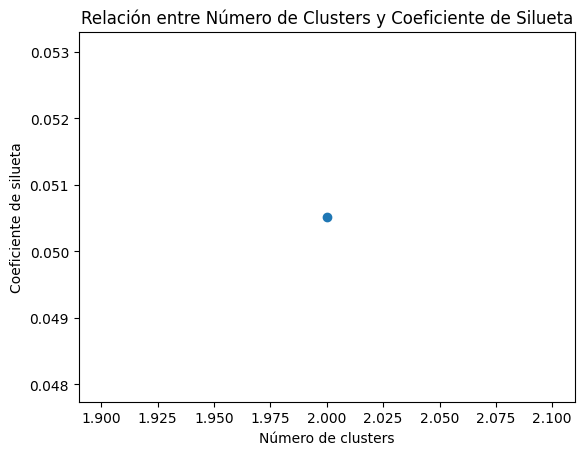

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


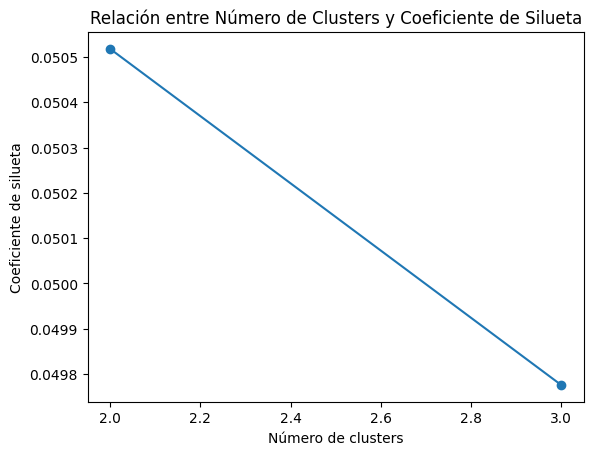

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


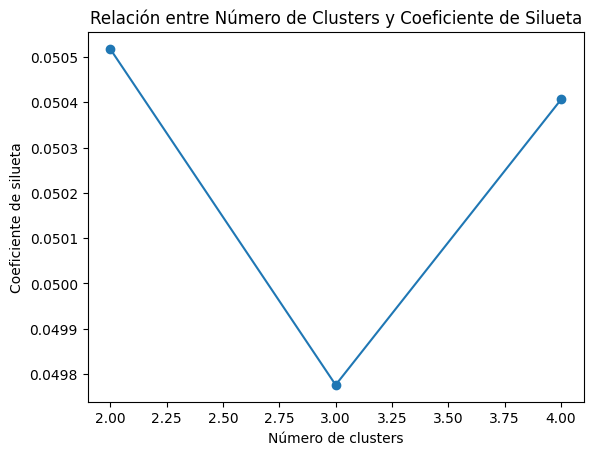

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


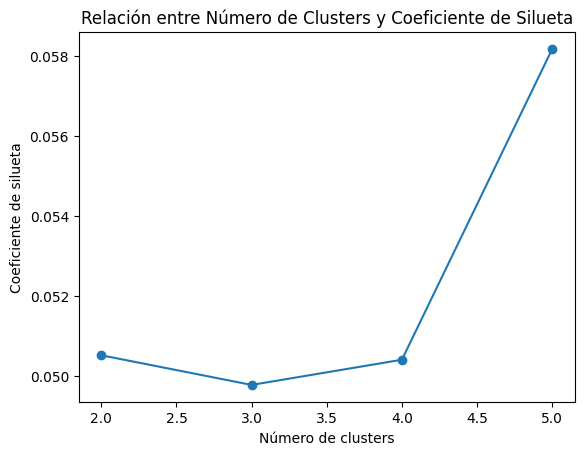

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


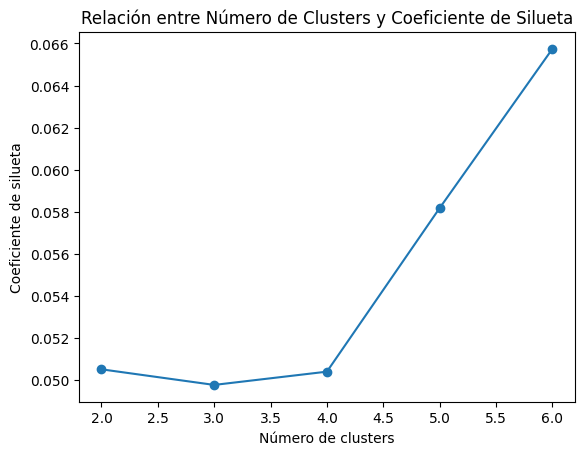

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


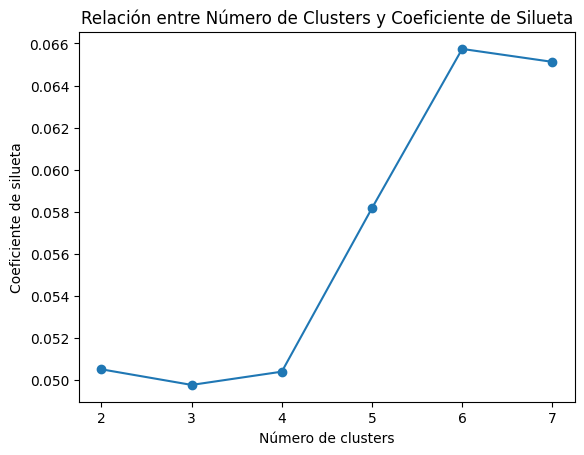

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


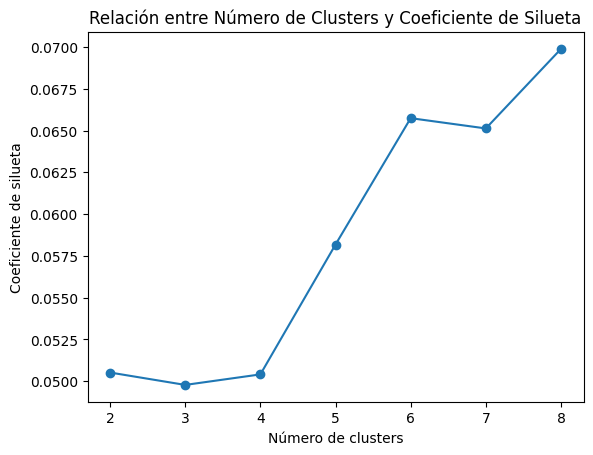

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


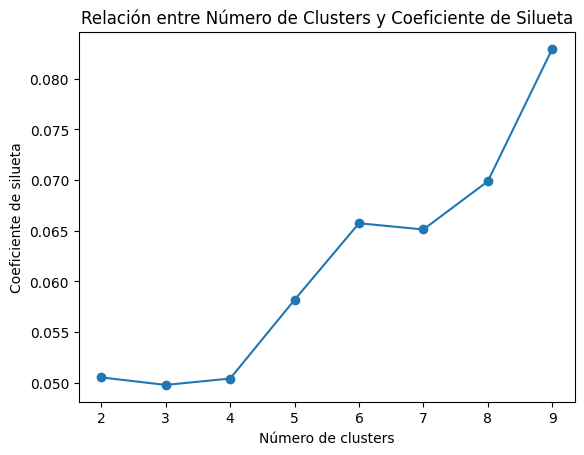

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


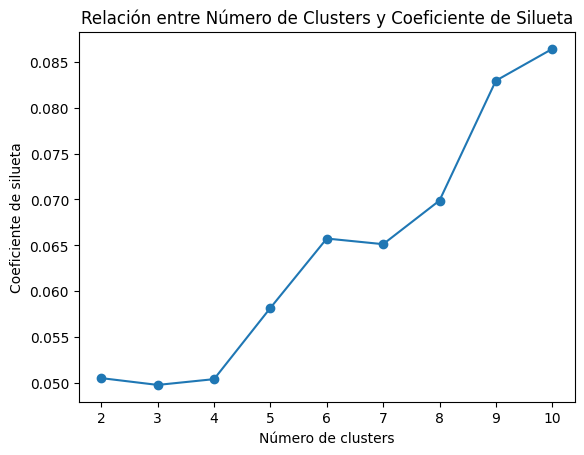

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


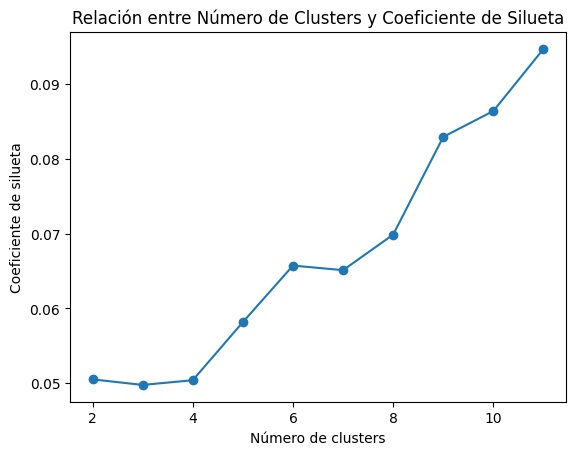

In [44]:
# Rango de clusters a probar
min_clusters = 2
max_clusters = 12

# Listas para almacenar los resultados
cluster_numbers = []
silhouette_scores = []

for k in range(min_clusters, max_clusters):
    # Entrenar el modelo de KMeans
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)

    # Obtener las etiquetas de los clusters
    labels = kmeans.labels_

    # Calcular el coeficiente de silueta
    silhouette_avg = silhouette_score(df_scaled, labels)

    # Almacenar el número de clusters y su coeficiente de silueta correspondiente
    cluster_numbers.append(k)
    silhouette_scores.append(silhouette_avg)

    # Graficar la relación entre el número de clusters y el coeficiente de silueta
    plt.plot(cluster_numbers, silhouette_scores, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Coeficiente de silueta')
    plt.title('Relación entre Número de Clusters y Coeficiente de Silueta')
    plt.show()

Se escogio el numero de cluster como 12, porque el coeficiente de silueta es más alto para 3 clusters en comparación con otros valores, esto sugiere que la estructura de los datos se divide naturalmente en tres grupos distintos. Pero como son muchos los reducimos a 4.



In [46]:
# Ejecutar K-means con el número de clusters seleccionado
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(df_scaled)
# Establecer opción para mostrar todas las filas
pd.set_option('display.max_rows', None)
# Añadir los resultados al DataFrame original para análisis
df['Cluster'] = clusters

# Visualizar resultados
print(df.groupby('Cluster').mean().transpose())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster                                                     0          1  \
Age                                                 27.779661  26.718310   
Hours per day                                        2.323729   3.357042   
Anxiety                                              4.966102   6.732394   
Depression                                           3.389831   5.897887   
Insomnia                                             4.000000   3.686620   
OCD                                                  1.898305   2.742958   
Primary streaming service_Apple Music                0.067797   0.035211   
Primary streaming service_I do not use a stream...   0.237288   0.070423   
Primary streaming service_Other streaming service    0.203390   0.077465   
Primary streaming service_Spotify                    0.305085   0.661972   
Primary streaming service_YouTube Music              0.186441   0.154930   
While working_No                                     0.372881   0.190141   
While workin

# Analisis de los 4 clusters

##Cluster 0:

Edad promedio de aproximadamente 27.78 años.
Tienden a pasar alrededor de 2.32 horas al día escuchando música.
Niveles medios de ansiedad y depresión.
Tendencia hacia la presencia de insomnio.
Baja frecuencia de escucha de música en comparación con otros clusters.
Géneros de música favoritos incluyen música clásica y videojuegos.
Experimentan efectos positivos y negativos por la música.

##Cluster 1:

Edad promedio de aproximadamente 26.72 años.
Pasan más tiempo al día escuchando música, con un promedio de aproximadamente 3.36 horas.
Altos niveles de ansiedad y depresión.
Menos propensos al insomnio en comparación con el Cluster 0.
Altamente asociados con el uso de Spotify como servicio de transmisión principal.
Mayor variedad de géneros musicales favoritos, incluido el rock.
Experimentan principalmente efectos positivos por la música.

##Cluster 2:

Edad promedio de aproximadamente 22.42 años.
Similar a Cluster 1 en términos de tiempo dedicado a la música por día.
Altos niveles de ansiedad y depresión.
Menos propensos al insomnio en comparación con otros clusters.
Mayor preferencia por Spotify como servicio de transmisión.
Menos diversidad en géneros musicales favoritos, con una preferencia notable por el metal.
Experimentan principalmente efectos positivos por la música.

##Cluster 3:

Edad promedio de aproximadamente 25.20 años.
Pasan un tiempo similar al día escuchando música como Cluster 1 y 2.
Niveles medios de ansiedad y depresión.
Propensión moderada al insomnio.
Prefieren una variedad de servicios de transmisión de música.
Mayor preferencia por géneros musicales como el metal y el rock.
Experimentan principalmente efectos positivos por la música, pero menos pronunciados que los otros clusters.